# Pokemon Type Classifier 

This kernel builds and evaluates a classifier that predicts Pokemon's primary type (e.g. grass, fire, water ...) based on its ability points (e.g. hp, attack, defense ...). 

Main libraries I used are Pandas for data preprocesses, and scikit-learn for modeling a multi-class classifier.

The training and testing datasets is ["pokemon.csv" provided by Kaggle](https://www.kaggle.com/rounakbanik/pokemon?select=pokemon.csv).

## Set up 
install and import libraries

In [1]:
!pip install seaborn
!pip install scipy
!pip install scikit-learn

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import pylab as pl

seaborn.set()

## Data Preprocess

### Data overview

In [33]:
data = pd.read_csv("../../assets/csv/pokemon.csv", index_col='pokedex_number')

In [34]:
data.head

<bound method NDFrame.head of                                   abilities  against_bug  against_dark  \
pokedex_number                                                           
1               ['Overgrow', 'Chlorophyll']         1.00           1.0   
2               ['Overgrow', 'Chlorophyll']         1.00           1.0   
3               ['Overgrow', 'Chlorophyll']         1.00           1.0   
4                  ['Blaze', 'Solar Power']         0.50           1.0   
5                  ['Blaze', 'Solar Power']         0.50           1.0   
...                                     ...          ...           ...   
797                         ['Beast Boost']         0.25           1.0   
798                         ['Beast Boost']         1.00           1.0   
799                         ['Beast Boost']         2.00           0.5   
800                         ['Prism Armor']         2.00           2.0   
801                          ['Soul-Heart']         0.25           0.5   

       

In [35]:
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

The dataframe has many columns. For the classifier, we need the column value for 'type1' as a target class, also possible main features are 'hp','attack','defense', 'sp_attack', 'sp_defense', and 'speed'.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 40 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

There're 801 kinds of pokemon, all of them having type1 but only 417 have type2. 
I will choose the type1 as the primary type of the pokemon, ignoring the type2.

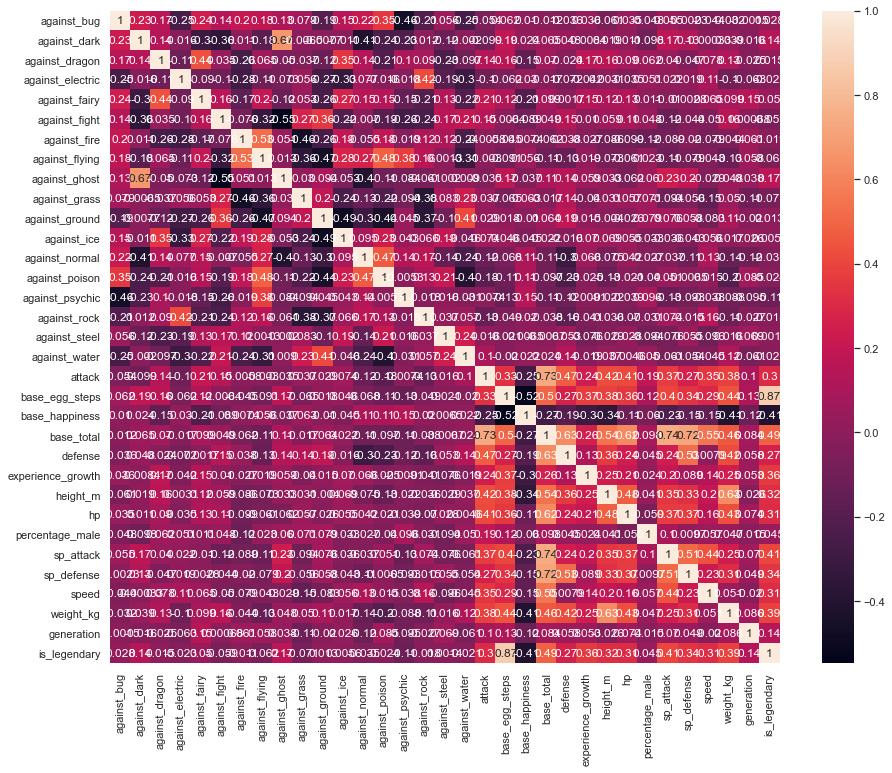

In [37]:
corrMatrix = data.corr()
plt.figure(figsize=(15,12))
seaborn.heatmap(corrMatrix, annot= True)
plt.show()

### Define target variable (class)

In [7]:
type = data['type1']
type.describe()

count       801
unique       18
top       water
freq        114
Name: type1, dtype: object

There're 18 unique types for pokemons

In [8]:
type.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

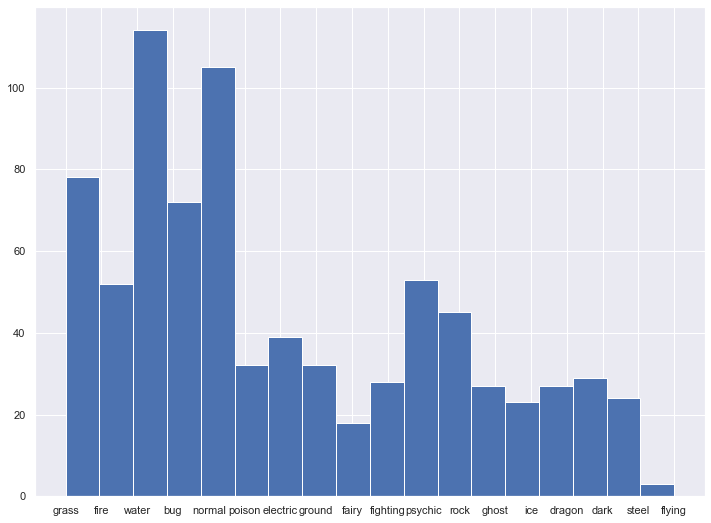

In [22]:
type.hist(bins=18, figsize=(12,9))

Top 3 types are water, normal, and grass. 

### Define feature variables

As feature variables used to classify each pokemon's primary type, I choose hp, attack, defense, sp_attack, sp_defense, speed for the initial classification. 

In [23]:
X = data.loc[:,['hp','attack','defense','sp_attack', 'sp_defense', 'speed']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 6 columns):
hp            801 non-null int64
attack        801 non-null int64
defense       801 non-null int64
sp_attack     801 non-null int64
sp_defense    801 non-null int64
speed         801 non-null int64
dtypes: int64(6)
memory usage: 43.8 KB


**Great!**  Successfully got the features having no null entity

### Split data into train and test data

In [39]:
type

pokedex_number
1        grass
2        grass
3        grass
4         fire
5         fire
        ...   
797      steel
798      grass
799       dark
800    psychic
801      steel
Name: type1, Length: 801, dtype: object

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, type, random_state=1)

In [41]:
X_train.head

<bound method NDFrame.head of                  hp  attack  defense  sp_attack  sp_defense  speed
pokedex_number                                                    
788              70      75      115         95         130     85
786              70      85       75        130         115     95
450             108     112      118         68          72     47
190              55      70       55         40          55     85
495              45      45       55         45          55     63
...             ...     ...      ...        ...         ...    ...
716             126     131       95        131          98     99
768              75     125      140         60          90     40
73               80      70       65         80         120    100
236              35      35       35         35          35     35
38               73      67       75         81         100    109

[600 rows x 6 columns]>

In [42]:
y_train.head

<bound method NDFrame.head of pokedex_number
788       water
786     psychic
450      ground
190      normal
495       grass
         ...   
716       fairy
768         bug
73        water
236    fighting
38         fire
Name: type1, Length: 600, dtype: object>

From the index, we can know the features array and the target array have identical index, so that these data can be used to train/test the classifier

## Choose a model

First of all, I am going to compare couple classifiers provided in scikit-learn by it's cross-validated score

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [44]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [45]:
results = []
for classifier in classifiers:
    kfold = KFold(n_splits=10, random_state=42)
    result = cross_val_score(classifier,X_train.values,y_train.values, cv = kfold, scoring = "accuracy")
    results.append(result)

In [46]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Nearest Neighbors 0.15833333333333335
Linear SVM 0.23000000000000004
RBF SVM 0.14
Gaussian Process 0.145
Decision Tree 0.16833333333333333
Random Forest 0.2
Neural Net 0.2533333333333333
AdaBoost 0.13999999999999999
Naive Bayes 0.17833333333333337
QDA nan


It seems that all classifiers having pretty low accuracies. Possible the size of dataset is not enough for multiple label classification 

I'm considering switch the classfier to 2-label classification. (water vs non-water)

In [64]:
y_bool_train = y_train == 'water'
y_bool_test = y_test == 'water'

In [70]:
results_bool = []
for classifier in classifiers:
    kfold = KFold(n_splits=10, random_state=42)
    result = cross_val_score(classifier,X_train.values,y_bool_train.values, cv = kfold, scoring = "accuracy")
    results_bool.append(result)

In [71]:
for i in range(len(names)):
    print(names[i],results_bool[i].mean())

Nearest Neighbors 0.8200000000000001
Linear SVM 0.8550000000000001
RBF SVM 0.8550000000000001
Gaussian Process 0.7933333333333333
Decision Tree 0.8416666666666666
Random Forest 0.8533333333333333
Neural Net 0.835
AdaBoost 0.8400000000000001
Naive Bayes 0.8483333333333334
QDA 0.8383333333333333


It looks like all classifiers are having similar accuracies, the max is 85.5%. I am going to choose RBF SVM to fit the model, and see its performance on test data set. 

## Fit and evaluate the classifier

## Evaluate with test data

## Conclusion